In [564]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

import warnings
warnings.filterwarnings(action = "ignore")

In [565]:
df_main = pd.read_csv("data/marketing.csv")
df = df_main.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [567]:
# null values count (%)

df.isnull().sum()*100/df.shape[0]

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
y            0.0
dtype: float64

In [568]:
# LABEL AND ONE HOT ENCODING FUNCTION

In [569]:
def labelAndOne(i):
    le = LabelEncoder()
    ohe = OneHotEncoder()
    dummy = le.fit_transform(df[i])
    dummy = ohe.fit_transform(dummy.reshape(-1,1)).toarray()
    names = df[i].unique()
    names.sort()
    df_ret = pd.DataFrame(dummy,columns = names)
    df.drop(columns = i, inplace =True)
    return df_ret

In [570]:
# job column's encoding

In [571]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [572]:
df_dummy = labelAndOne("job")

In [573]:
df["admin"] = df_dummy["admin"]
df["blue-collar"] = df_dummy["blue-collar"]
df["entrepreneur"] = df_dummy["entrepreneur"]
df["housemaid"] = df_dummy["housemaid"]
df["management"] = df_dummy["management"]
df["retired"] = df_dummy["retired"]
df["self-employed"] = df_dummy["self-employed"]
df["services"] = df_dummy["services"]
df["student"] = df_dummy["student"]
df["technician"] = df_dummy["technician"]
df["unemployed"] = df_dummy["unemployed"]
df["unknown_job"] = df_dummy["unknown"]

In [574]:
#marital

In [575]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [576]:
df_dummy = labelAndOne("marital")
df_dummy.head().T

,0,1,2,3,4
divorced,0.0,0.0,0.0,0.0,0.0
married,1.0,0.0,1.0,1.0,0.0
single,0.0,1.0,0.0,0.0,1.0


In [577]:
df["divorced"] = df_dummy["divorced"]
df["married"] = df_dummy["married"]
df["single"] = df_dummy["single"]

In [578]:
#education

In [579]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [580]:
df.education.value_counts()

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

In [581]:
df_dummy = labelAndOne("education")
df_dummy.head().T

,0,1,2,3,4
primary,0.0,0.0,0.0,0.0,0.0
secondary,0.0,1.0,1.0,0.0,0.0
tertiary,1.0,0.0,0.0,0.0,0.0
unknown,0.0,0.0,0.0,1.0,1.0


In [582]:
df["primary_school"] = df_dummy["primary"]
df["secondary_school"] = df_dummy["secondary"]
df["tertiary_school"] = df_dummy["tertiary"]
df["unknown_school"] = df_dummy["unknown"]

In [583]:
#default

In [584]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [585]:
le = LabelEncoder()
df["default"] = le.fit_transform(df.default)

In [586]:
#housing

In [587]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [588]:
le = LabelEncoder()
df["housing"] = le.fit_transform(df.housing)

In [589]:
#loan

In [590]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [591]:
le = LabelEncoder()
df["loan"] = le.fit_transform(df.loan)

In [592]:
#contact

In [593]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [594]:
df_dummy = labelAndOne("contact")
df_dummy.head().T

,0,1,2,3,4
cellular,0.0,0.0,0.0,0.0,0.0
telephone,0.0,0.0,0.0,0.0,0.0
unknown,1.0,1.0,1.0,1.0,1.0


In [595]:
df["cellular"] = df_dummy["cellular"]
df["telephone"] = df_dummy["telephone"]
df["unknown_contact"] = df_dummy["unknown"]

In [596]:
#day

In [597]:
df.day.describe()

count    40000.000000
mean        16.017225
std          8.278127
min          1.000000
25%          8.000000
50%         17.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [598]:
#month

In [599]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr'], dtype=object)

In [600]:
lst = []
for i in range(df.shape[0]):
    if df.month.iloc[i] == "jan":
        lst.append(1)
    elif df.month.iloc[i] == "feb":
        lst.append(2)
    elif df.month.iloc[i] == "mar":
        lst.append(3)
    elif df.month.iloc[i] == "apr":
        lst.append(4)
    elif df.month.iloc[i] == "may":
        lst.append(5)
    elif df.month.iloc[i] == "jun":
        lst.append(6)
    elif df.month.iloc[i] == "jul":
        lst.append(7)
    elif df.month.iloc[i] == "aug":
        lst.append(8)
    elif df.month.iloc[i] == "sep":
        lst.append(9)
    elif df.month.iloc[i] == "oct":
        lst.append(10)
    elif df.month.iloc[i] == "nov":
        lst.append(11)
    elif df.month.iloc[i] == "dec":
        lst.append(12)

df.month = lst

In [601]:
#y 

In [602]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [603]:
df.y = le.fit_transform(df.y)

In [604]:
# Correlation

In [605]:
corr = df.corr()

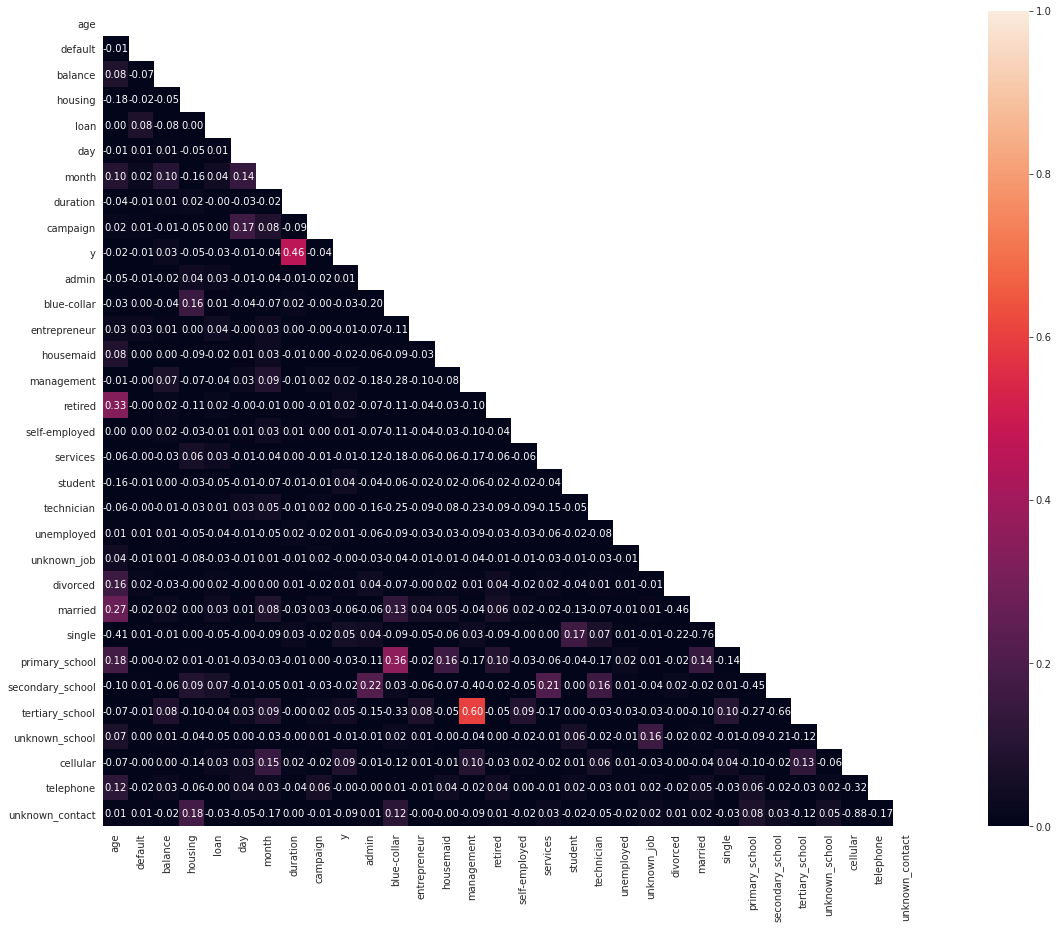

In [606]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 15))
    ax = sns.heatmap(corr, mask=mask, vmin= 0, annot = True, fmt= ".2f",vmax=1, square=True)

# Data Exploration

In [607]:
# education exploration

In [608]:
lst = []
sp = pd.DataFrame()
for i in df_main.education.unique():
    st = i + "_school"
    ty = df.groupby(df.y[df[st] == 1])[st].count()
    ty = pd.DataFrame(ty)
    lst.append((ty.iloc[1]*100)/(ty.iloc[0]+ty.iloc[1]))

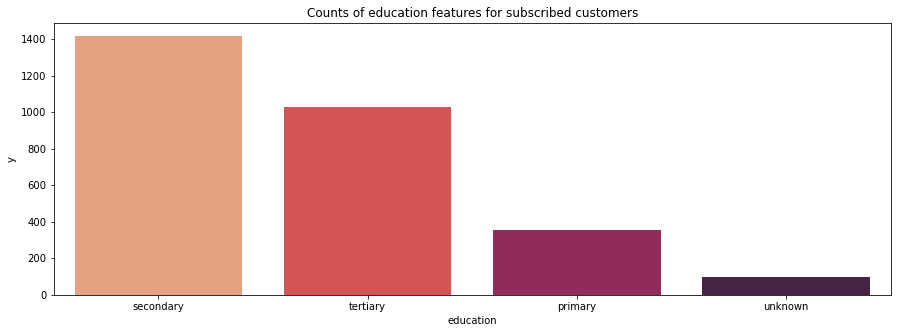

In [609]:
count = pd.DataFrame(df_main.groupby(df_main.education[df_main.y == "yes"])["y"].count()).sort_values(by="y",ascending = False).T
plt.figure(figsize=(15,5))
plt.title("Counts of education features for subscribed customers")
plt.ylabel("Count")
sns.barplot(x=count.columns,y=count.iloc[0],palette="rocket_r")
plt.show()

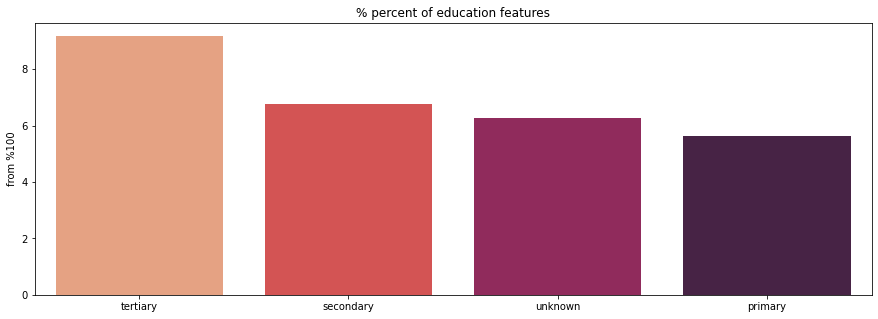

In [610]:
plt.figure(figsize=(15,5))
plt.title("% percent of education features")
plt.ylabel("from %100")
sns.barplot(x=df_main.education.unique(),y=lst,palette="rocket_r")
plt.show()

In [611]:
# Customer who have tertiary education level is have high chance to subscribe. 

In [612]:
#job exploration

In [613]:
lst = []
sp = pd.DataFrame()
j = 0
for i in df_main.job.unique():
    if i == "unknown":
        st = i + "_job"
    else:
        st = i
    ty = df.groupby(df.y[df[st] == 1])[st].count()
    ty = pd.DataFrame(ty)
    lst.append((ty.iloc[1]*100)/(ty.iloc[0]+ty.iloc[1]))

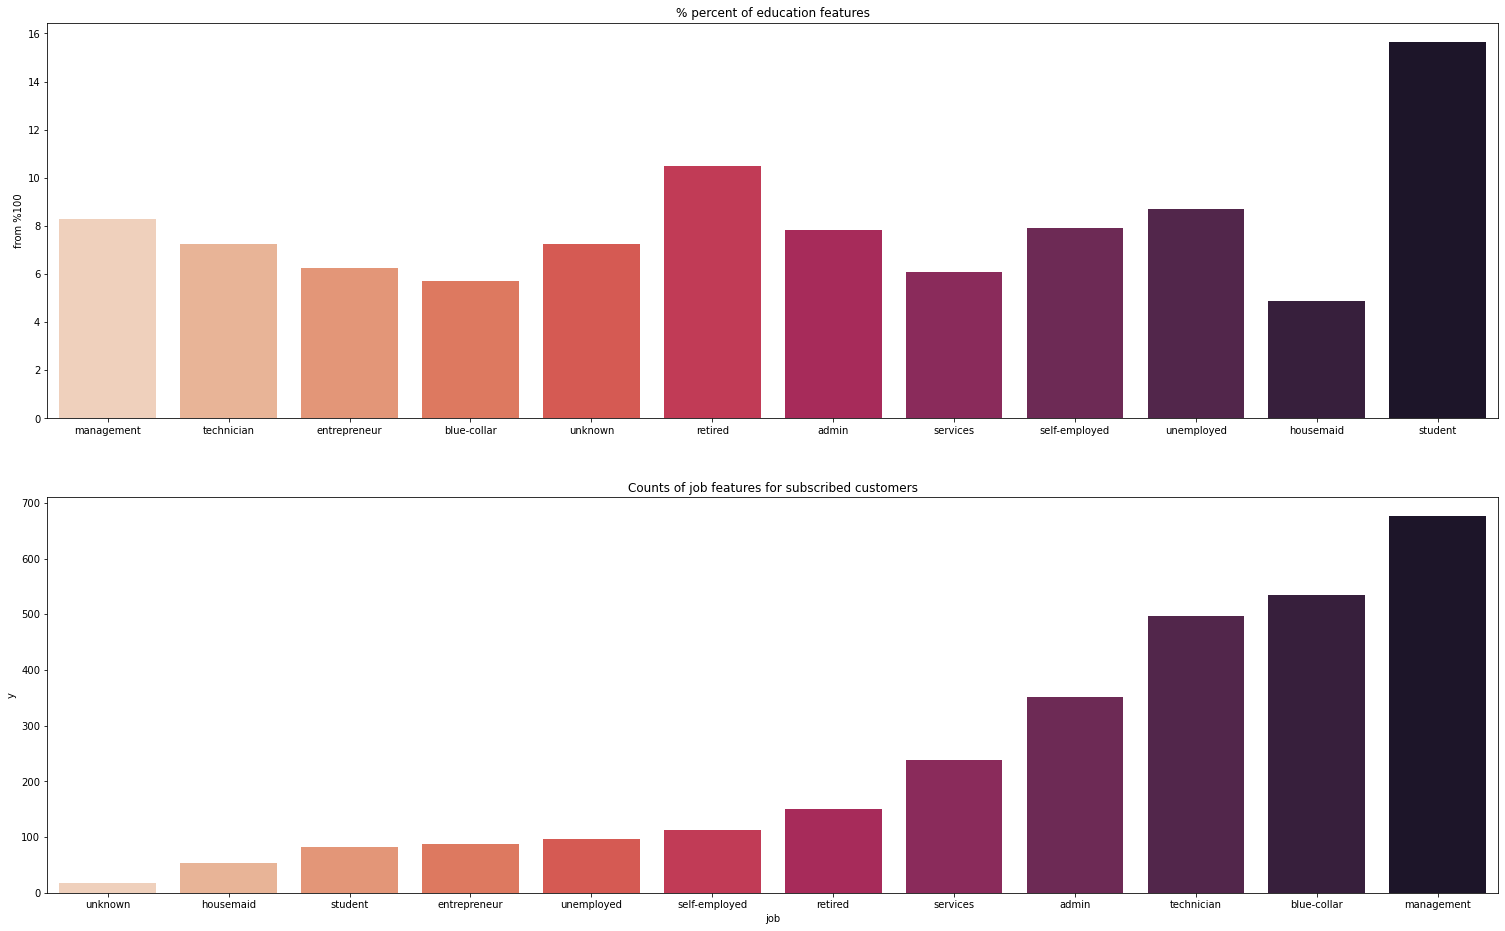

In [614]:
plt.figure(figsize=(26,16))
plt.subplot(211)
plt.title("% percent of education features")
plt.ylabel("from %100")
sns.barplot(x=df_main.job.unique(),y=lst,palette="rocket_r")

count = pd.DataFrame(df_main.groupby(df_main.job[df_main.y == "yes"])["y"].count()).sort_values(by="y").T
plt.subplot(212)
plt.title("Counts of job features for subscribed customers")
plt.ylabel("Count")
sns.barplot(x=count.columns,y=count.iloc[0],palette="rocket_r")
plt.show()

In [615]:
# Students and retired persons have good percantage to subscribe to our company but most of customer have management,blue-collar job.

In [616]:
#contact

In [617]:
lst=[]
j = 0
for i in df_main.contact.unique():
    if i == "unknown":
        st = i + "_contact"
    else:
        st = i
    ty = df.groupby(df.y[df[st] == 1])[st].count()
    ty = pd.DataFrame(ty)
    lst.append((ty.iloc[1]*100)/(ty.iloc[0]+ty.iloc[1]))

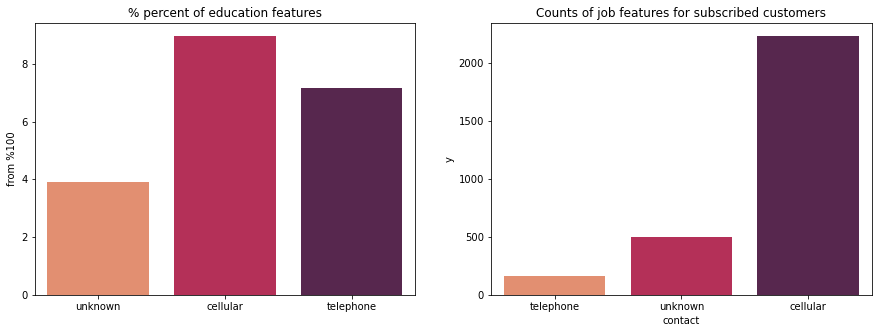

In [618]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("% percent of education features")
plt.ylabel("from %100")
sns.barplot(x=df_main.contact.unique(),y=lst,palette="rocket_r")
plt.subplot(122)
count = pd.DataFrame(df_main.groupby(df_main.contact[df_main.y == "yes"])["y"].count()).sort_values(by="y").T
plt.title("Counts of job features for subscribed customers")
plt.ylabel("Count")
sns.barplot(x=count.columns,y=count.iloc[0],palette="rocket_r")
plt.show()


In [619]:
# We have same percentage at telephone and unkown contacts but customer who are using cellular have much more population percantage.

In [620]:
#month

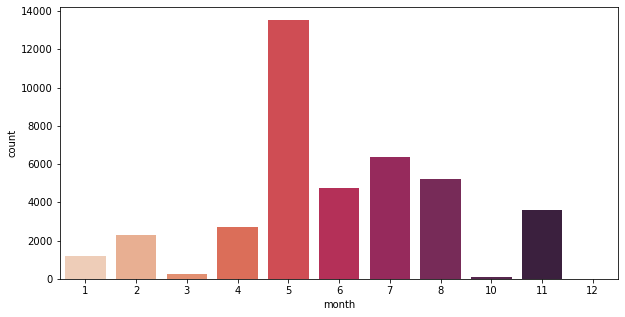

In [621]:
plt.figure(figsize=(10,5))
sns.countplot(df.month,palette="rocket_r")
plt.show()

In [622]:
# We are have more subscribed customer on MAY!

In [623]:
#duration

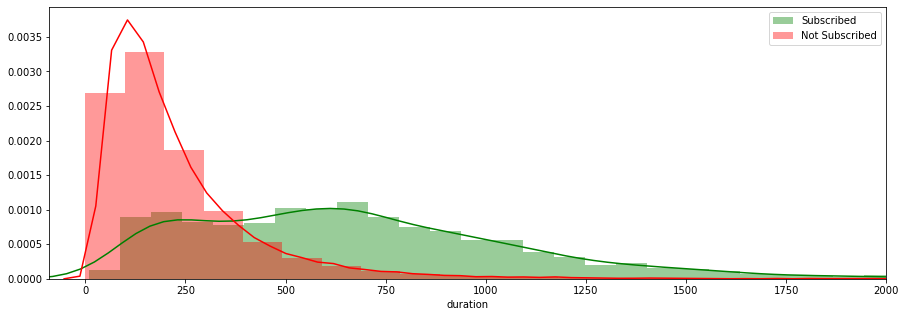

In [624]:
plt.figure(figsize=(15,5))
sns.distplot(df.duration[df.y==1],label="Subscribed",color = "green")
sns.distplot(df.duration[df.y==0],label = "Not Subscribed",color = "red")
plt.xlim(-90,2000)
plt.legend()
plt.show()

In [625]:
#marital

In [626]:
lst = []
sp = pd.DataFrame()
j = 0
for i in df_main.marital.unique():
    
    st = i
    ty = df.groupby(df.y[df[st] == 1])[st].count()
    ty = pd.DataFrame(ty)
    lst.append((ty.iloc[1]*100)/(ty.iloc[0]+ty.iloc[1]))

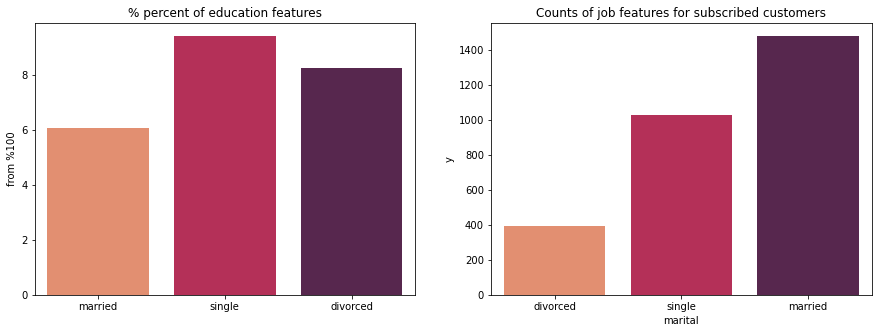

In [627]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("% percent of education features")
plt.ylabel("from %100")
sns.barplot(x=df_main.marital.unique(),y=lst,palette="rocket_r")
plt.subplot(122)
count = pd.DataFrame(df_main.groupby(df_main.marital[df_main.y == "yes"])["y"].count()).sort_values(by="y").T
plt.title("Counts of job features for subscribed customers")
plt.ylabel("Count")
sns.barplot(x=count.columns,y=count.iloc[0],palette="rocket_r")
plt.show()


In [628]:
# We should more focus on divorced and single customers

In [629]:
# Age

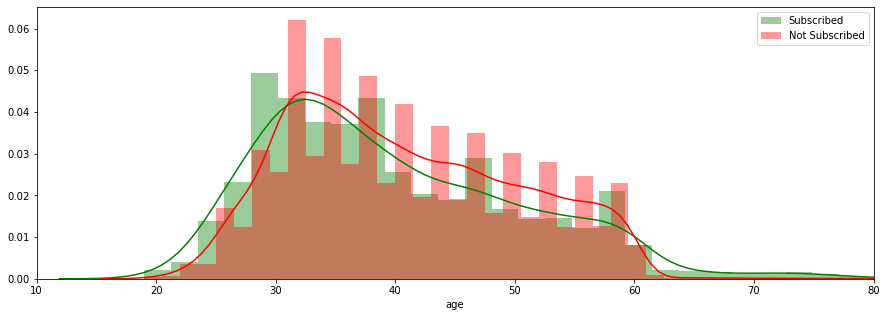

In [630]:
plt.figure(figsize=(15,5))
sns.distplot(df.age[df.y==1],label="Subscribed",color = "green")
sns.distplot(df.age[df.y==0],label = "Not Subscribed",color = "red")
plt.xlim(10,80)
plt.legend()
plt.show()

In [631]:
# We have better success rate customers who are smaller than 31.

In [632]:
#campaign

In [643]:
df.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

(0.0, 10.0)

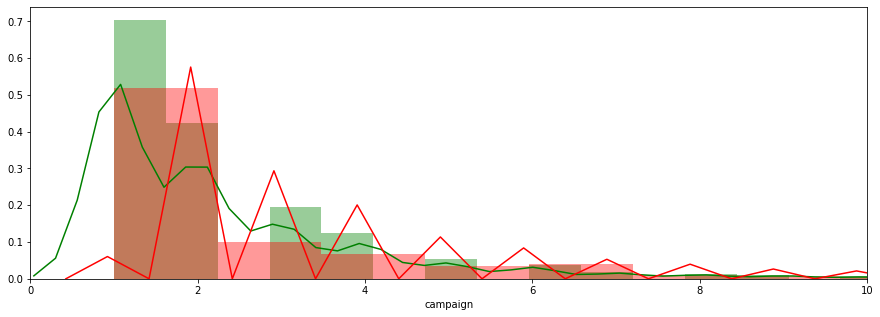

In [656]:
plt.figure(figsize=(15,5))
sns.distplot(df.campaign[df.y==1],label="Subscribed",color = "green")
sns.distplot(df.campaign[df.y==0],label = "Not Subscribed",color = "red")
plt.xlim(0,10)

In [ ]:
#We can say until 5 call, there are better results but then we can't talk about success.

In [194]:
# X and Y

In [195]:
X = df.drop(columns = "y")
y = df.y

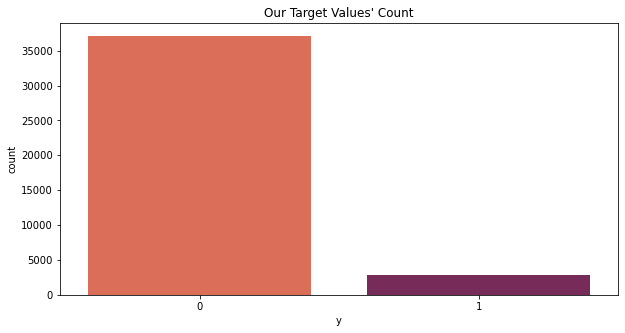

In [503]:
plt.figure(figsize=(10,5))
plt.title("Our Target Values' Count")
sns.countplot(df.y,palette="rocket_r")
plt.show()

In [538]:
#Our dataset is imblanced so I will use some tools for solving this problem.

In [239]:
# SMOTE

In [242]:
from imblearn.over_sampling import SMOTE

In [243]:
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_sample(X, y)

In [196]:
# Train test split

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [245]:
# XGBoost

In [246]:
xgb = XGBClassifier()

In [247]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [248]:
y_test_pred = xgb.predict(X_test)

In [249]:
y_train_pred = xgb.predict(X_train)

In [250]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7423
           1       0.97      0.96      0.97      7419

    accuracy                           0.97     14842
   macro avg       0.97      0.97      0.97     14842
weighted avg       0.97      0.97      0.97     14842



In [251]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     29681
           1       0.99      0.98      0.98     29685

    accuracy                           0.98     59366
   macro avg       0.98      0.98      0.98     59366
weighted avg       0.98      0.98      0.98     59366



In [252]:
# Cross Validation

In [308]:
xgb = XGBClassifier()

In [309]:
scores = cross_val_score(xgb,X_train,y_train,cv=5)

In [310]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.00)


In [311]:
scores1 = cross_val_score(xgb,X_test,y_test,cv=5)

In [312]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

Accuracy: 0.96 (+/- 0.01)


In [319]:
df_summary = pd.DataFrame([scores1.mean(),scores.mean()],index=["Test","Train"],columns = ["XGB"])

In [314]:
# Importance of Features for buy

In [259]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

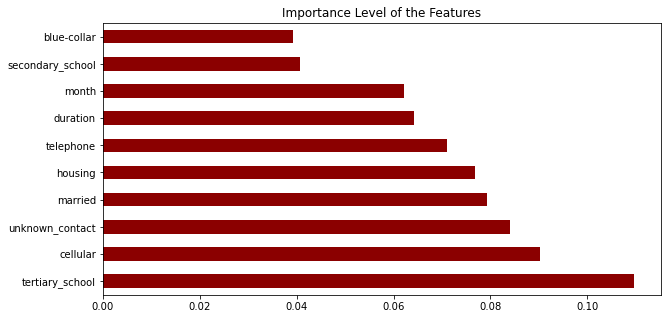

In [260]:
importance_level = pd.Series(data=xgb.feature_importances_,index= X_train.columns)

importance_level_sorted = importance_level.sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
importance_level_sorted.plot(kind='barh', color='darkred')
plt.title('Importance Level of the Features')
plt.show()

In [261]:
# Random Forest

In [320]:
rd = RandomForestClassifier()

In [321]:
scores = cross_val_score(rd,X_train,y_train,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.00)


In [322]:
scores1 = cross_val_score(rd,X_test,y_test,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

Accuracy: 0.96 (+/- 0.00)


In [323]:
df_summary["Random Forest"] = pd.DataFrame([scores1.mean(),scores.mean()],index=["Test","Train"],columns = ["Random Forest"])

In [324]:
df_summary

,XGB,Random Forest
Test,0.960855,0.958631
Train,0.963801,0.965182


In [265]:
rd.fit(X_train,y_train)

RandomForestClassifier()

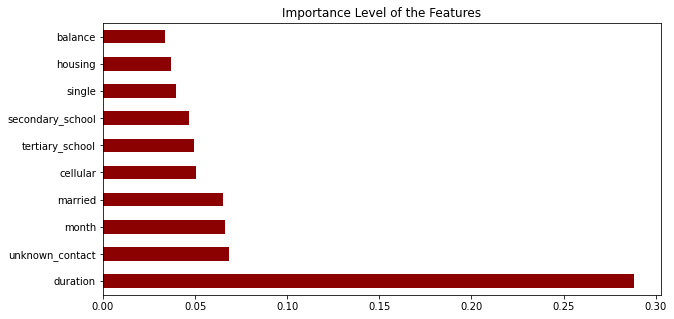

In [269]:
importance_level = pd.Series(data=rd.feature_importances_,index= X_train.columns)

importance_level_sorted = importance_level.sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
importance_level_sorted.plot(kind='barh', color='darkred')
plt.title('Importance Level of the Features')
plt.show()

In [270]:
# Decision Tree

In [325]:
dt = DecisionTreeClassifier()

In [326]:
scores = cross_val_score(dt,X_train,y_train,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.00)


In [327]:
scores1 = cross_val_score(dt,X_test,y_test,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

Accuracy: 0.93 (+/- 0.01)


In [328]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [329]:
df_summary["Decision Tree"] = pd.DataFrame([scores1.mean(),scores.mean()],index=["Test","Train"],columns = ["Decision Tree"])

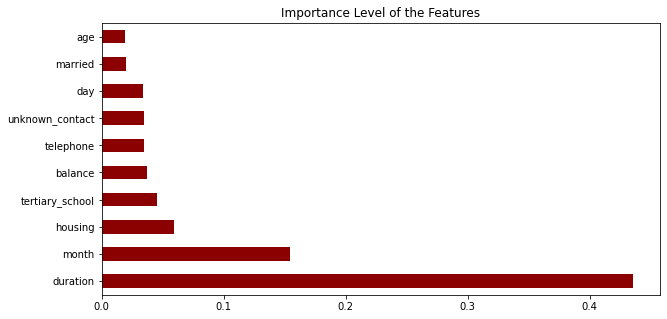

In [278]:
importance_level = pd.Series(data=dt.feature_importances_,index= X_train.columns)

importance_level_sorted = importance_level.sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
importance_level_sorted.plot(kind='barh', color='darkred')
plt.title('Importance Level of the Features')
plt.show()

In [279]:
#Logistic Regression

In [330]:
log_reg = LogisticRegression()

In [331]:
scores = cross_val_score(dt,X_train,y_train,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.00)


In [332]:
scores1 = cross_val_score(dt,X_test,y_test,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

Accuracy: 0.92 (+/- 0.01)


In [333]:
df_summary["Logistic Regression"] = pd.DataFrame([scores1.mean(),scores.mean()],index=["Test","Train"],columns = ["Logistic Regression"])

In [285]:
# KNN 

In [334]:
knn = KNeighborsClassifier(n_neighbors=7)

In [335]:
scores = cross_val_score(knn,X_train,y_train,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.00)


In [336]:
scores1 = cross_val_score(knn,X_test,y_test,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

Accuracy: 0.83 (+/- 0.01)


In [337]:
df_summary["KNN"] = pd.DataFrame([scores1.mean(),scores.mean()],index=["Test","Train"],columns = ["KNN"])

In [504]:
#ANN

In [505]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.utils import to_categorical

In [506]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [507]:
n_outputs = y_train_cat.shape[1]

In [511]:
model = Sequential()
model.add(Dense(16,activation = "relu", input_shape = (X_train.shape[1],)))
model.add(Dense(32,activation = "relu"))
model.add(Dropout(0.33))
model.add(Dense(16,activation = "tanh"))
model.add(Dense(n_outputs,activation = "sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                512       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 34        
Total params: 1,618
Trainable params: 1,618
Non-trainable params: 0
_________________________________________________________________


In [512]:
model.compile(loss="categorical_crossentropy",optimizer= "adam",metrics = ["accuracy"])

In [510]:
model.fit(X_train,y_train_cat,epochs=16,verbose = 0 , batch_size = 64)

In [515]:
model.evaluate(X_test,y_test_cat,batch_size= 64,verbose = 0)[0]

0.8686981201171875

In [516]:
model.evaluate(X_train,y_train_cat,batch_size = 65,verbose = 0)[0]

0.8705163598060608

In [517]:
df_summary["ANN"] = pd.DataFrame([model.evaluate(X_test,y_test_cat,batch_size= 64,verbose = 0)[0],model.evaluate(X_train,y_train_cat,batch_size = 65,verbose = 0)[0]],index=["Test","Train"],columns = ["ANN"])

# SUMMARY

In [518]:
df_summary

,XGB,Random Forest,Decision Tree,Logistic Regression,KNN,ANN
Test,0.960855,0.958631,0.927099,0.924472,0.826641,0.868698
Train,0.963801,0.965182,0.944531,0.944177,0.880016,0.870516


In [657]:
# Customer who have tertiary education level is have high chance to subscribe. 
# Students and retired persons have good percantage to subscribe to our company but most of customer have management,blue-collar job.
# We have same percentage at telephone and unkown contacts but customer who are using cellular have much more population percantage.
# We are have more subscribed customer on MAY!
# We should more focus on divorced and single customers
# We have better success rate customers who are smaller than 31.

* **For detail please look the Data Exploration part.**